In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

from py.mKMeans import KMeans, KMeansPlus, SoftKMeans, EnhancedSoftKMeans, EnhancedKMeans
from py.mPCA import PCA
from PY_LinearAutoEncoder import LinearAutoEncoder

%matplotlib inline

In [75]:
size = 1024
def getProcessedArray(image_path, d_dimension):

    img = Image.open(image_path).resize((size,size))

    # 将图像转换为numpy数组
    img_np = np.array(img)


    # 将图像数据转换为二维数组，形状为 (像素数, 颜色通道数)
    X = img_np.reshape(-1, 3)
    
    # 初始化PCA，假设我们要将每个通道的维度降低到2
    pca = PCA()
    # 训练PCA
    X_pca = pca.transform(X,d_dimension)
    # 重构图像数据
    X_reconstructed = pca.inverse_transform(X_pca,d_dimension)
    
    # 重构的图像将缺少一个颜色通道，我们可以将其设置为零
    # 假设我们保留了RG，那么我们将B通道设为0
    
    B_zeros = np.zeros((X_reconstructed.shape[0], 3-d_dimension))
    # if d_dimension == 3:
    #     X_reconstructed_with_B1 = X_pca
    # else:
    print('shape of pca is:', X_pca.shape)
    X_reconstructed_with_B1 = np.hstack((X_pca, B_zeros))
    # img_reconstructed_np1 = X_reconstructed_with_B1.reshape(size,size, 3).astype(np.uint8)
    # X_reconstructed_with_B1.resize().show()
    X_reconstructed_with_B = X_reconstructed
    # print('shape of X_reconstructed_with_B1:', img_reconstructed_np1.shape)
    # 将重构的数据转换回图像格式
    img_reconstructed_np = X_reconstructed_with_B.reshape(size,size, 3).astype(np.uint8)
    return  X_reconstructed_with_B1+pca.mean, img_reconstructed_np

has not trained!
shape of t is:
(3, 3)
shape of pca is: (1048576, 3)
has not trained!
shape of t is:
(2, 3)
shape of pca is: (1048576, 2)
has not trained!
shape of t is:
(1, 3)
shape of pca is: (1048576, 1)


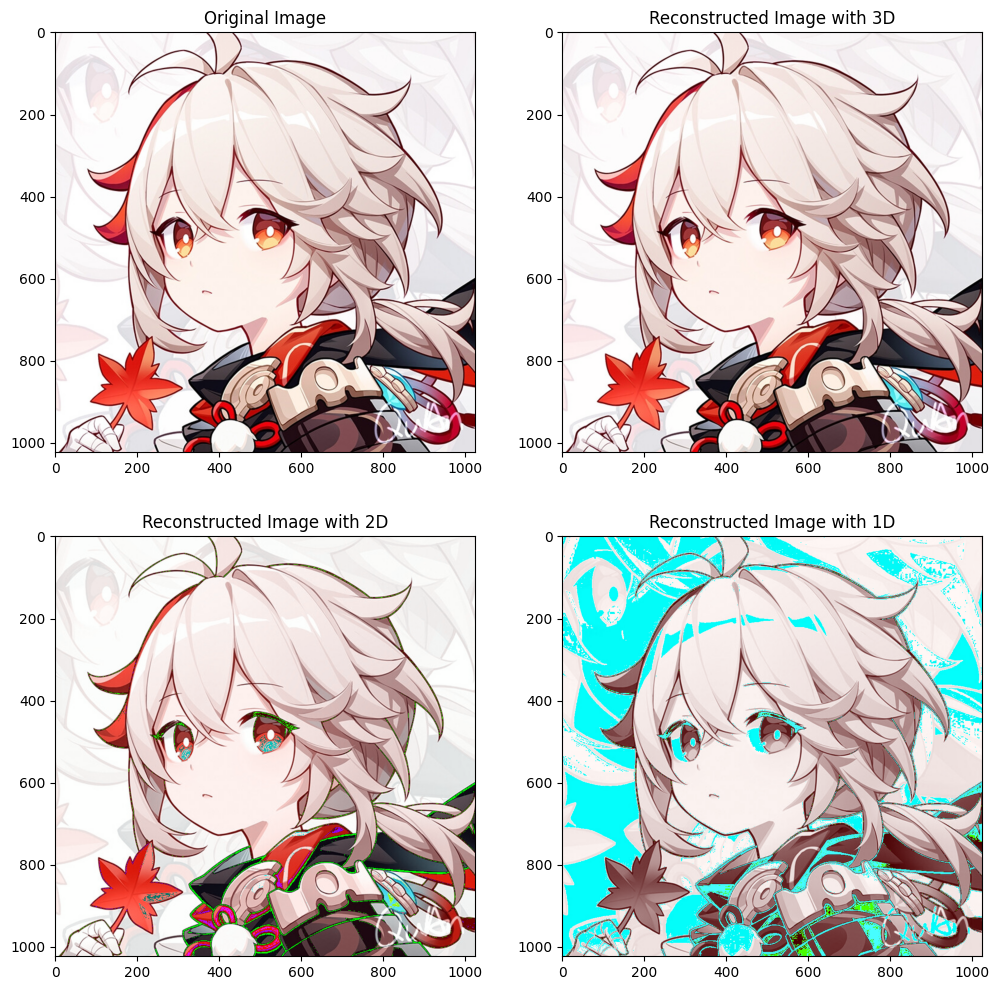

In [76]:
image_path = 'statics/kazuha2.jpg'

img = Image.open(image_path).resize((size,size))

# 将图像转换为numpy数组
img_np = np.array(img)

# 分离RGB通道
R = img_np[:, :, 0].flatten()
G = img_np[:, :, 1].flatten()
B = img_np[:, :, 2].flatten()

# 将图像数据转换为二维数组，形状为 (像素数, 颜色通道数)
X = img_np.reshape(-1, 3)

# getProcessedArray(image_path, 2);
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title('Original Image')

img_3d, img_3d_reconstruct = getProcessedArray(image_path, 3)
img_2d, img_2d_reconstruct = getProcessedArray(image_path, 2)
img_1d, img_1d_reconstruct = getProcessedArray(image_path, 1)

plt.subplot(2,2,2)
plt.imshow(img_3d_reconstruct)
plt.title('Reconstructed Image with 3D')

plt.subplot(2,2,3)
plt.imshow(img_2d_reconstruct)
plt.title('Reconstructed Image with 2D')

plt.subplot(2,2,4)
plt.imshow(img_1d_reconstruct)
plt.title('Reconstructed Image with 1D')

plt.show()
# img_reconstructed = Image.fromarray(img_reconstructed_np)
# 
# # 显示重构的图像
# img_reconstructed.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1024, 1024, 3)
(1024, 1024, 3)
(1024, 1024, 3)


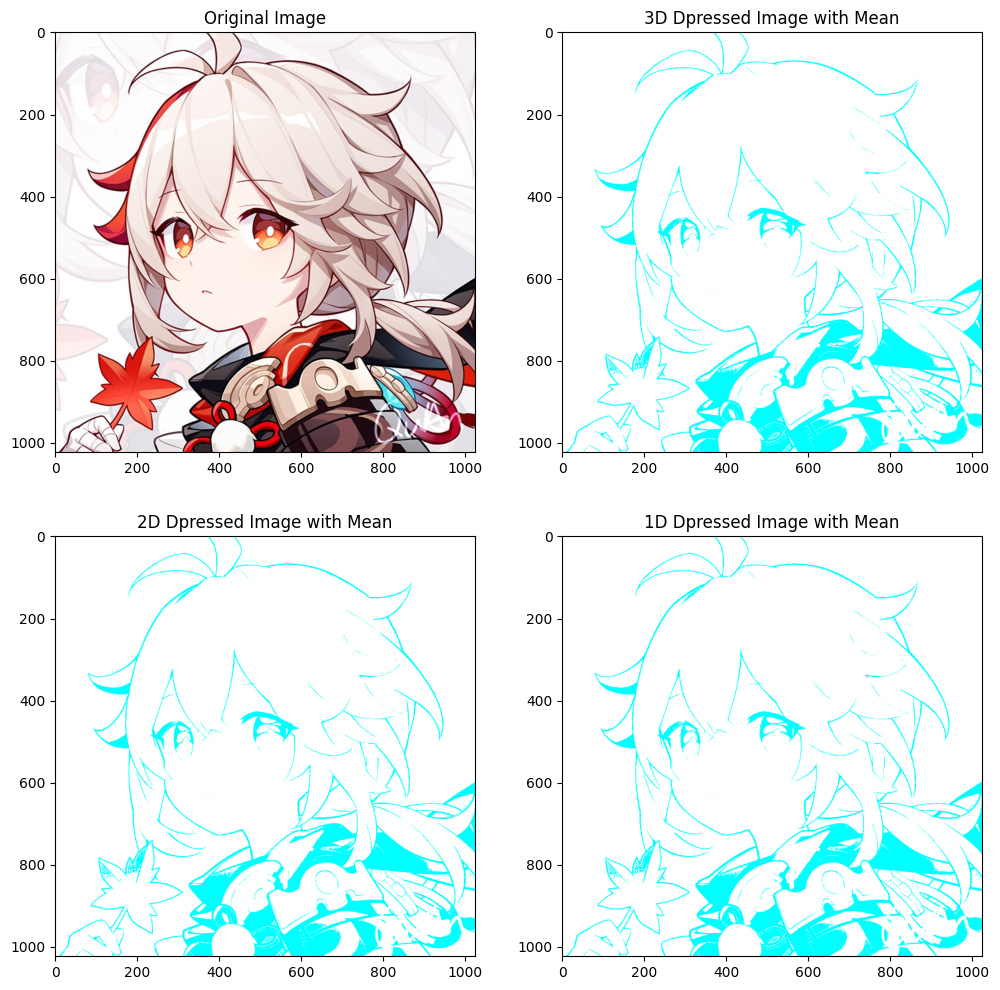

In [78]:
img_1d = np.array(img_1d)
img_2d = np.array(img_2d)
img_3d = np.array(img_3d)

print(img_1d.shape)
print(img_2d.shape)
print(img_3d.shape)

img_1d = np.resize(img_1d, (size,size,3))
img_2d = np.resize(img_2d, (size,size,3))
img_3d = np.resize(img_3d, (size,size,3))

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(img_3d)
plt.title('3D Dpressed Image with Mean')

plt.subplot(2,2,3)
plt.imshow(img_2d)
plt.title('2D Dpressed Image with Mean')

plt.subplot(2,2,4)
plt.imshow(img_1d)
plt.title('1D Dpressed Image with Mean')

plt.show()